In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import bz2
from glob import glob
import imageio

In [2]:
sns.set(rc={'figure.figsize':(10.5,6.8)})
length = 105
width = 68

In [3]:
def create_pitch(length, width, linecolor):

    """
    mainly stolen from fc python
    param length: an int the length of the field
    param width: an int the height of the field
    param linecolor: the color of the lines
"""
    #Create figure
    fig=plt.figure()
    #fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,width], color=linecolor)
    plt.plot([0,length],[width,width], color=linecolor)
    plt.plot([length,length],[width,0], color=linecolor)
    plt.plot([length,0],[0,0], color=linecolor)
    plt.plot([length/2,length/2],[0,width], color=linecolor)
    plt.fill_between(x = [-10, length+10],
                     y1 = [width+10, width + 10],
                     y2 = [-10, -10], color='green')

    #Left Penalty Area
    plt.plot([16.5 ,16.5],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
    plt.plot([0,16.5],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
    plt.plot([16.5,0],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)

    #Right Penalty Area
    plt.plot([(length-16.5),length],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
    plt.plot([(length-16.5), (length-16.5)],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
    plt.plot([(length-16.5),length],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)

    #Left 5-meters Box
    plt.plot([0,5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
    plt.plot([5.5,5.5],[(width/2+7.32/2+5.5),(width/2-7.32/2-5.5)],color=linecolor)
    plt.plot([5.5,0.5],[(width/2-7.32/2-5.5),(width/2-7.32/2-5.5)],color=linecolor)

    #Right 5-meters Box
    plt.plot([length,length-5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
    plt.plot([length-5.5,length-5.5],[(width/2+7.32/2+5.5),width/2-7.32/2-5.5],color=linecolor)
    plt.plot([length-5.5,length],[width/2-7.32/2-5.5,width/2-7.32/2-5.5],color=linecolor)

    #Prepare Circles
    centreCircle = plt.Circle((length/2,width/2),9.15,color=linecolor,fill=False)
    centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
    leftPenSpot = plt.Circle((11,width/2),0.8,color=linecolor)
    rightPenSpot = plt.Circle((length-11,width/2),0.8,color=linecolor)

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    leftArc = Arc((11,width/2),height=18.3,width=18.3,angle=0,theta1=308,theta2=52,color=linecolor)
    rightArc = Arc((length-11,width/2),height=18.3,width=18.3,angle=0,theta1=128,theta2=232,color=linecolor)

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
            #Axis titles
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax

In [4]:
match_results = pd.read_csv("../input/euro-cup-2020/eurocup_2020_results.csv")
#original dataset has whitespaces, so annoying
match_results[['team_name_home', 'team_name_away']] = match_results[['team_name_home', 'team_name_away']].applymap(lambda x: str.strip(x))

In [5]:
match_results.head(3)

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,events_list,lineup_home,lineup_away
0,Final,11.07.2021,True,3,2,Italy,England,1,1,66%,34%,19,6,6,2,53%,47%,"[{'event_team': 'away', 'event_time': "" 2' "", ...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Kane', 'Player_Number': '9'}..."
1,Semi-finals,07.07.2021,False,False,False,England,Denmark,2,1,59%,41%,20,6,10,3,50%,50%,"[{'event_team': 'away', 'event_time': "" 30' "",...","[{'Player_Name': 'Kane', 'Player_Number': '9'}...","[{'Player_Name': 'Krogh Damsgaard', 'Player_Nu..."
2,Semi-finals,06.07.2021,True,4,2,Italy,Spain,1,1,29%,71%,7,16,4,5,49%,51%,"[{'event_team': 'away', 'event_time': "" 51' "",...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Torres', 'Player_Number': '1..."


In [6]:
italy_wales_matches = (match_results['team_name_home'].isin(["Italy", "Wales"])) | (match_results['team_name_away'].isin(["Italy", "Wales"]))
iw_matches = match_results[italy_wales_matches]

In [7]:
iw_matches

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,events_list,lineup_home,lineup_away
0,Final,11.07.2021,True,3,2,Italy,England,1,1,66%,34%,19,6,6,2,53%,47%,"[{'event_team': 'away', 'event_time': "" 2' "", ...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Kane', 'Player_Number': '9'}..."
2,Semi-finals,06.07.2021,True,4,2,Italy,Spain,1,1,29%,71%,7,16,4,5,49%,51%,"[{'event_team': 'away', 'event_time': "" 51' "",...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Torres', 'Player_Number': '1..."
5,Quarter-finals,02.07.2021,False,False,False,Belgium,Italy,1,2,46%,54%,10,14,4,3,58%,42%,"[{'event_team': 'away', 'event_time': "" 13' "",...","[{'Player_Name': 'Lukaku', 'Player_Number': '9...","[{'Player_Name': 'Insigne', 'Player_Number': '..."
13,Round of 16,26.06.2021,False,False,False,Italy,Austria,2,1,52%,48%,27,16,6,3,50%,50%,"[{'event_team': 'away', 'event_time': "" 2' "", ...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Arnautovic', 'Player_Number'..."
14,Round of 16,26.06.2021,False,False,False,Wales,Denmark,0,4,47%,53%,11,16,1,8,39%,61%,"[{'event_team': 'home', 'event_time': "" 26' "",...","[{'Player_Name': 'Moore', 'Player_Number': '13...","[{'Player_Name': 'Dolberg', 'Player_Number': '..."
25,Group stage: Matchday 3,20.06.2021,False,False,False,Italy,Wales,1,0,70%,30%,23,3,6,1,56%,44%,"[{'event_team': 'home', 'event_time': "" 39' "",...","[{'Player_Name': 'Chiesa', 'Player_Number': '1...","[{'Player_Name': 'James', 'Player_Number': '20..."
36,Group stage: Matchday 2,16.06.2021,False,False,False,Italy,Switzerland,3,0,49%,51%,13,6,3,1,43%,57%,"[{'event_team': 'home', 'event_time': "" 19' "",...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Embolo', 'Player_Number': '7..."
37,Group stage: Matchday 2,16.06.2021,False,False,False,Turkey,Wales,0,2,64%,36%,18,16,6,7,40%,60%,"[{'event_team': 'away', 'event_time': "" 42' "",...","[{'Player_Name': 'Yilmaz', 'Player_Number': '1...","[{'Player_Name': 'Moore', 'Player_Number': '13..."
49,Group stage: Matchday 1,12.06.2021,False,False,False,Wales,Switzerland,1,1,35%,65%,9,18,2,4,46%,55%,"[{'event_team': 'away', 'event_time': "" 30' "",...","[{'Player_Name': 'Moore', 'Player_Number': '13...","[{'Player_Name': 'Embolo', 'Player_Number': '7..."
50,Group stage: Matchday 1,11.06.2021,False,False,False,Turkey,Italy,0,3,36%,64%,3,24,0,8,51%,49%,"[{'event_team': 'home', 'event_time': "" 45' "",...","[{'Player_Name': 'Yilmaz', 'Player_Number': '1...","[{'Player_Name': 'Insigne', 'Player_Number': '..."


In [8]:
import json
with open('../input/socceranalytics/matches.json') as f:
    data = json.load(f)
    matches = pd.json_normalize(data, sep = "_")

In [9]:
matches.columns

Index(['match_id', 'match_date', 'kick_off', 'home_score', 'away_score',
       'match_status', 'match_status_360', 'last_updated', 'last_updated_360',
       'match_week', 'competition_competition_id', 'competition_country_name',
       'competition_competition_name', 'season_season_id',
       'season_season_name', 'home_team_home_team_id',
       'home_team_home_team_name', 'home_team_home_team_gender',
       'home_team_home_team_group', 'home_team_country_id',
       'home_team_country_name', 'home_team_managers',
       'away_team_away_team_id', 'away_team_away_team_name',
       'away_team_away_team_gender', 'away_team_away_team_group',
       'away_team_country_id', 'away_team_country_name', 'away_team_managers',
       'metadata_data_version', 'metadata_shot_fidelity_version',
       'metadata_xy_fidelity_version', 'competition_stage_id',
       'competition_stage_name', 'stadium_id', 'stadium_name',
       'stadium_country_id', 'stadium_country_name', 'referee_id',
       're

In [10]:
mask = (matches["home_team_home_team_name"] == "Italy") | (matches["away_team_away_team_name"] == "Italy")
italy_matches = matches[mask]
match_id = italy_matches[italy_matches["away_team_away_team_name"] == "Wales"].match_id.iloc[0]

In [11]:
match_id

3788766

In [12]:
import bz2
zipfile = bz2.BZ2File(f"../input/socceranalytics/three-sixty/three-sixty/{match_id}.json.bz2")
file = zipfile.read()
open(f"{match_id}.json", 'wb').write(file)
with open(f"{match_id}.json") as f:
    threesixty = json.load(f)
    match_events360 = pd.json_normalize(threesixty)

In [13]:
zipfile = bz2.BZ2File(f"../input/socceranalytics/events/events/{match_id}.json.bz2")
file = zipfile.read()
open(f"{match_id}.json", 'wb').write(file)
with open(f"{match_id}.json") as f:
    events = json.load(f)
    match_events = pd.json_normalize(events, sep = "_")

In [14]:
shots = match_events[match_events['type_name'] == 'Shot']
passes = match_events[match_events['type_name'] == 'Pass']

In [15]:
# max_x = 0
# max_y = 0
# for frame in match_events360.freeze_frame:
#     for player in frame:
#         if max_x < player['location'][0]:
#             max_x = player['location'][0]
#         if max_y < player['location'][1]:
#             max_y = player['location'][1]

In [16]:
shots = shots.reset_index(drop = True)
x, y= shots['location'][0]

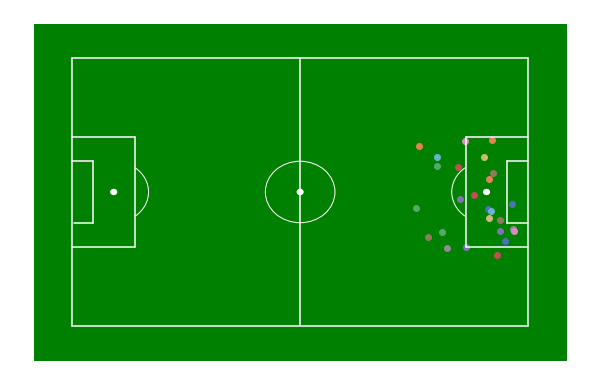

In [17]:
fig, ax = create_pitch(120, 80,'white')
for shot in shots['location']:
    x, y = shot
    y = 80 - y
    plt.scatter(x,y, marker = 'o')
    #shotCircle = plt.Circle((x,y) , 2, color="red")     
    #ax.add_patch(shotCircle)

plt.show()

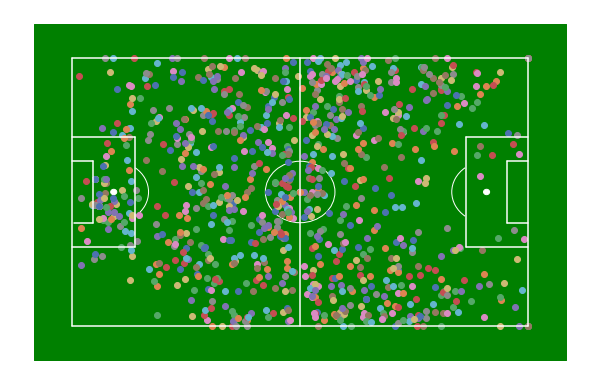

In [18]:
fig, ax = create_pitch(120, 80,'white')
for pass_ball in passes['location']:
    x, y = pass_ball
    y = 80 - y
    plt.scatter(x,y, marker = 'o')

plt.show()

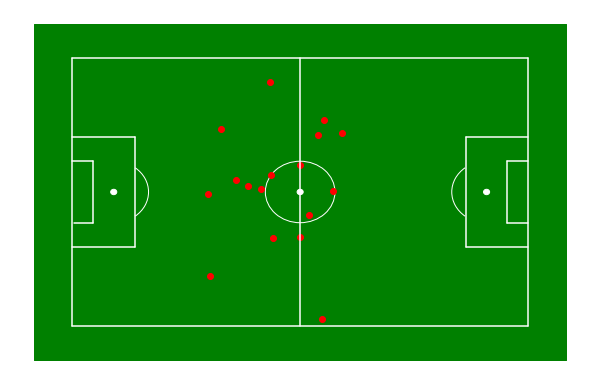

In [19]:
fig, ax = create_pitch(120, 80,'white')
for d in match_events360['freeze_frame'][4]:
    x, y = d['location']
    y = 80 - y
    plt.scatter(x, y, color = 'red', marker = 'o')
plt.show()

In [20]:
game = pd.read_parquet("../input/socceranalytics/italywales.pq")
position_cols = [col for col in game if "_x" in col or "_y" in col or "_type" in col]
x_pos = [col for col in game if "_x" in col]
y_pos = [col for col in game if "_y" in col]
type_cols = [col for col in game if "_type" in col]
id_cols = [col for col in game if "_id" in col]
game[x_pos] = game[x_pos].astype(float) / 100.0
game[y_pos] = game[y_pos].astype(float) / 100.0

In [21]:
import requests
from bs4 import BeautifulSoup

baseURL = "https://www.uefa.com/uefaeuro-2020/teams/"

class Player:
    def __init__(self, attr):
        self.id             = attr[0]
        self.name           = attr[1]
        self.number         = attr[2]
        self.position       = attr[3]
        self.age            = attr[4]
        self.gamesPlayed    = attr[5]
        self.goals          = attr[6]

def parseSite(teamID):
    teamURL = baseURL + str(teamID) + "/squad/"

    # Get the HTML from the site
    page = requests.get(teamURL)

    # Check for bad status code
    if not page.status_code == 200:
        print("Error: Could not get the page")
        return

    # Parse the HTML
    html = page.text
    soup = BeautifulSoup(html, 'html.parser')
    
    # The HTML has multiple divs with class 'squad--team-wrap' that contain all 
    # the player infos split by postition
    squad = soup.find_all('div', class_='squad--team-wrap')

    # Extract the player infos from the HTML
    players = []

    for wrap in squad[1:5]:
        postition = wrap.h5.text[:-1]

        for player in wrap.find('tbody').find_all('tr'):
            infos = player.find_all('td')

            players.append(Player([
                infos[0].find('a', class_='player-name')["href"].split("/")[-2].split("-")[0], 
                infos[0].find('a', class_='player-name')["title"], 
                infos[0].text.strip().split(" ")[-1].strip("()"), 
                postition, 
                infos[1].text.strip(), 
                infos[2].text.strip().replace("-", "0"), 
                infos[3].text.strip().replace("-", "0")
            ]))

    return players

italy = parseSite(66) # Italy
wales = parseSite(144) # Wales

In [22]:
player_map = dict()
for player in italy:
    player_map[player.id] = player.name
for player in wales:
    player_map[player.id] = player.name

In [23]:
with open(f"../input/socceranalytics/lineups/lineups/{match_id}.json") as f:
    lineup = json.load(f)
    lineups = pd.json_normalize(data)

In [24]:
wales_lineup = lineup[0]
italy_lineup = lineup[1]

In [25]:
random_point = game.sample(1)

In [26]:
for col in x_pos:
    print(random_point[col])

157982   -30.86
Name: ball_x, dtype: float64
157982   -35.19
Name: player1_x, dtype: float64
157982   -34.07
Name: player2_x, dtype: float64
157982   -30.56
Name: player3_x, dtype: float64
157982   -48.53
Name: player4_x, dtype: float64
157982   NaN
Name: player5_x, dtype: float64
157982   NaN
Name: player6_x, dtype: float64
157982   -32.32
Name: player7_x, dtype: float64
157982   NaN
Name: player8_x, dtype: float64
157982   NaN
Name: player9_x, dtype: float64
157982   -11.77
Name: player10_x, dtype: float64
157982   -17.99
Name: player11_x, dtype: float64
157982   NaN
Name: player12_x, dtype: float64
157982   NaN
Name: player13_x, dtype: float64
157982   NaN
Name: player14_x, dtype: float64
157982   -20.76
Name: player15_x, dtype: float64
157982   NaN
Name: player16_x, dtype: float64
157982   NaN
Name: player17_x, dtype: float64
157982   -3.54
Name: player18_x, dtype: float64
157982   -30.38
Name: player19_x, dtype: float64
157982   -33.08
Name: player20_x, dtype: float64
157982   NaN

faile
faile
faile
faile
faile
faile
faile
faile
faile
faile
faile
faile
faile
faile
faile
faile
faile


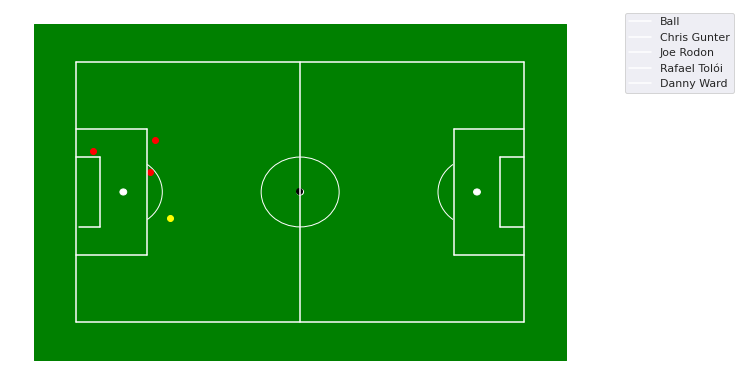

In [27]:
length, width = 105, 68
fig, ax = create_pitch(length, width,'white')
x, y = random_point["ball_x"].iloc[0] / 100, random_point["ball_y"].iloc[0] /100
x = length/2.0 + x
y = width/2.0 + y
plt.scatter(x, y, marker = 'o', color = 'black')
p = 1
names = ["Ball"]
for i in range(3, len(position_cols), 3):
    t, x, y = random_point[position_cols[i]].iloc[0], random_point[position_cols[i + 1]].iloc[0], random_point[position_cols[i + 2]].iloc[0]
    if np.isnan(x) or np.isnan(y):
        continue
    t = int(t)
    x = length/2.0 + x
    y = width/2.0 + y
    try:
        name = player_map[random_point[f'player{p}_id'].iloc[0]]
        names.append(name)
    except:
        print('faile')
        continue
    y = 80 - y
    color = 'yellow' if t == 0 else 'red'
    plt.scatter(x,y, marker = 'o', color = color)
    p += 1
plt.legend(names, loc = 'upper right', bbox_to_anchor = (1.25, 1))
plt.savefig('figure.png')
plt.show()

In [28]:
game.shape

(166313, 167)

In [29]:
short_play = game.iloc[8000:8010].reset_index(drop = True)

In [30]:
short_play.head()

,time,ball_type,ball_id,ball_x,ball_y,ball_z,ball_sampling,player1_type,player1_id,player1_x,...,player31_type,player31_id,player31_x,player31_y,player31_sampling,player32_type,player32_id,player32_x,player32_y,player32_sampling
0,2021-06-20T16:05:14.094Z,7,0,36.57,-0.70,18,0,1,102221,30.45,...,None,None,NaN,NaN,None,None,None,NaN,NaN,None
1,2021-06-20T16:05:14.134Z,7,0,36.62,-1.41,12,0,1,102221,30.47,...,None,None,NaN,NaN,None,None,None,NaN,NaN,None
2,2021-06-20T16:05:14.174Z,7,0,36.53,-1.27,16,0,1,102221,30.49,...,None,None,NaN,NaN,None,None,None,NaN,NaN,None
3,2021-06-20T16:05:14.214Z,7,0,36.65,-0.62,0,0,1,102221,30.52,...,None,None,NaN,NaN,None,None,None,NaN,NaN,None
4,2021-06-20T16:05:14.254Z,7,0,36.62,1.01,12,0,1,102221,30.54,...,None,None,NaN,NaN,None,None,None,NaN,NaN,None


In [31]:
import os
os.mkdir('images')

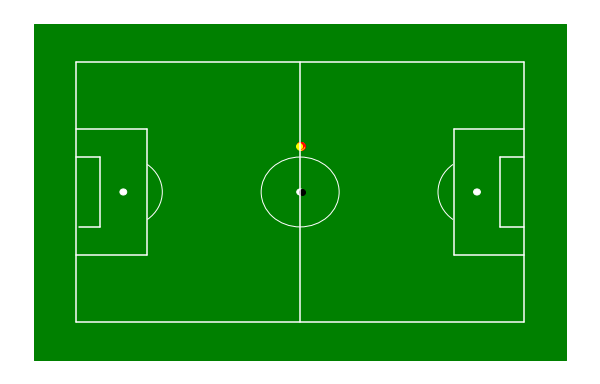

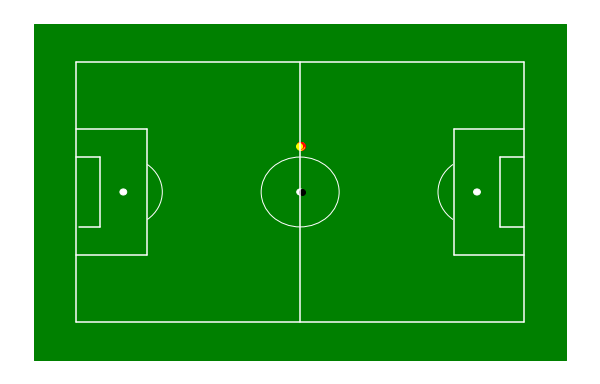

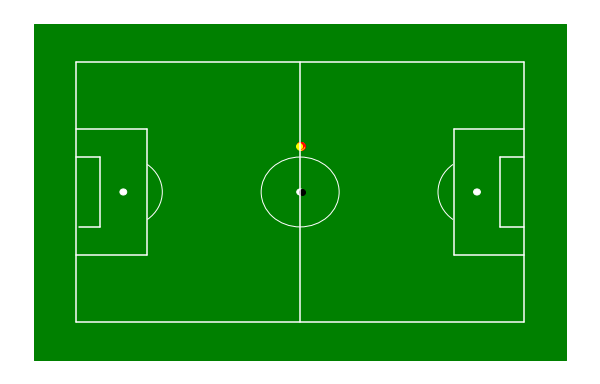

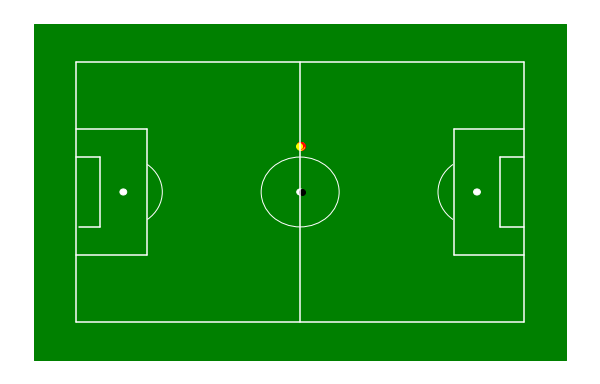

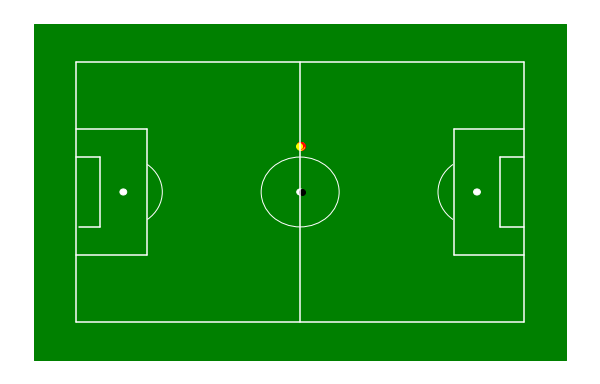

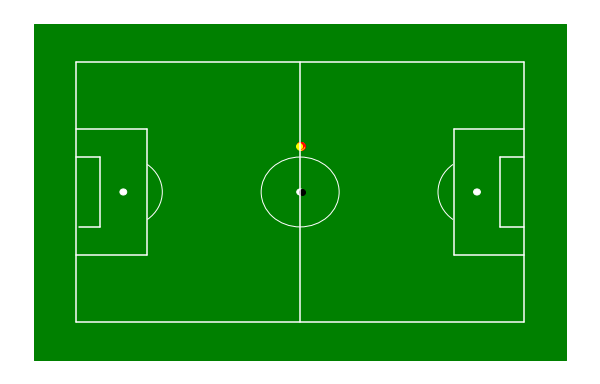

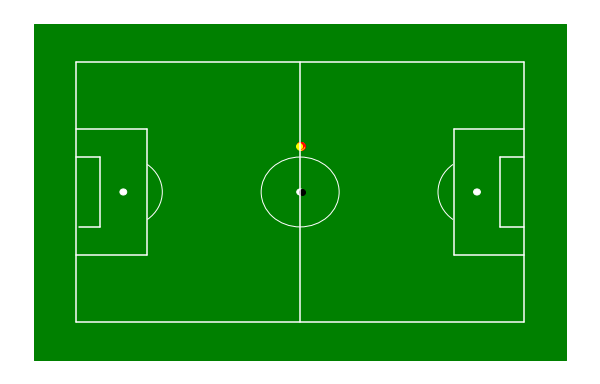

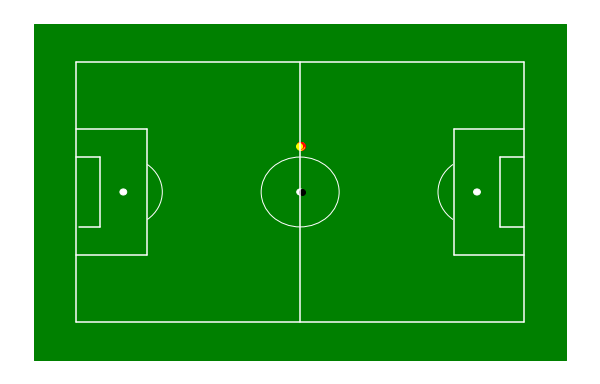

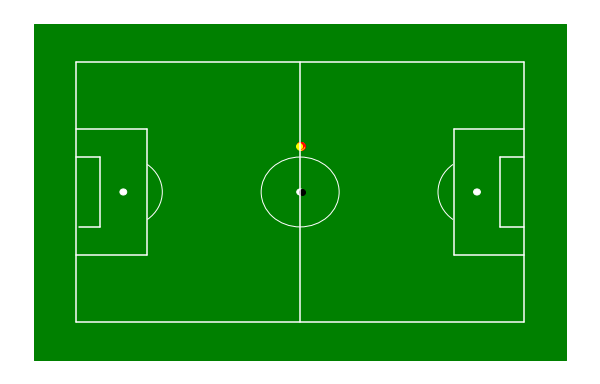

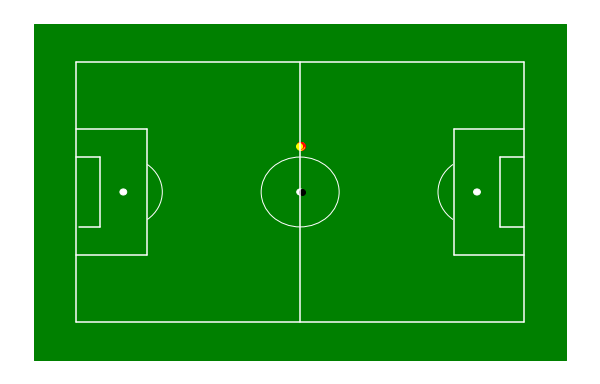

In [32]:
length, width = 105, 68

for index, frame in short_play.iterrows():
    fig, ax = create_pitch(length, width,'white')
    x, y = short_play.loc[index, "ball_x"] / 100, short_play.loc[index, "ball_y"] /100
    x = length/2.0 + x
    y = width/2.0 + y
    plt.scatter(x, y, marker = 'o', color = 'black')
    for i in range(3, len(position_cols), 3):
        t, x, y = short_play.loc[index, position_cols[i]], short_play.loc[index, position_cols[i + 1]], short_play.loc[index, position_cols[i + 2]]
        if np.isnan(x) or np.isnan(y):
            continue
        x, y, t = float(x) / 100.0, float(y) / 100.0, int(t)
        x = length/2.0 + x
        y = width/2.0 + y

        y = 80 - y
        color = 'yellow' if t == 0 else 'red'
        plt.scatter(x,y, marker = 'o', color = color)

    plt.savefig(f'images/{index}.png')
#     if index % 100 == 0:
#         plt.show()

In [33]:
#This function creates a gif like you've seen in my presentation
def create_gif(images_path, gif_path):
    images = []
    filenames = sorted(glob(images_path))
    #I know it's a double sort but this isn't A&D!!!
    filenames.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))
    for index, filename in enumerate(filenames):
        img = imageio.imread(filename)
        images.append(img)
    imageio.mimsave(gif_path, images, fps=10) # Save gif    

In [34]:
import numpy as np
from math import pi
from bokeh.models.glyphs import Circle, Patches, Wedge
from bokeh.plotting import figure
from bokeh.models import Range1d, PanTool, ResetTool, HoverTool, ColumnDataSource, LabelSet
from bokeh.io import output_notebook, output_file, show

def draw_pitch(width = 700, height = 500,
                measure = 'metres',
                fill_color = 'green', fill_alpha = 0.5,
                line_color = 'white', line_alpha = 1,
                hspan = [0, 105], vspan = [0, 68],
                tooltips = [],
                source = [],
                arcs = True):
    '''
    -----
    Draws and returns a pitch on a Bokeh figure object with width 105m and height 68m
    p = drawpitch()
    -----
    If you are using StatsBomb Data with a 120x80yard pitch, use:
    measure = 'SB'
    -----
    If you are using Opta Data, use:
    measure = 'Opta'
    -----
    If you are using any other pitch size, set measure to yards or metres
    for correct pitch markings and
    hspan = [left, right] // eg. for SBData this is: hspan = [0, 120]
    vspan = [bottom, top] //
    to adjust the plot to your needs.
    -----
    set arcs = False to not draw the penaltybox arcs
    '''

    # measures:
    # goalcenter to post, fiveyard-box-length, fiveyard-width,
    # box-width, penalty-spot x-distance, circle-radius


    if measure == 'yards':
        measures = [4, 6, 10, 18, 42, 12, 10]
    elif (measure == 'SBData')|(measure == 'StatsBomb')|(measure == 'statsbomb')|(measure == 'SB'):
        measures = [4, 6, 10, 18, 44, 12, 10]
        hspan = [0, 120]
        vspan = [0, 80]
    elif measure == 'Opta':
        measures = [4.8, 5.8, 13.2, 17, 57.8, 11.5, 8.71]
        hspan = [0, 100]
        vspan = [0, 100]
    else: #if measure = metres or whatever else
        measures = [3.66, 5.5, 9.16, 16.5, 40.32, 11, 9.15]

    hmid = (hspan[1]+hspan[0])/2
    vmid = (vspan[1]+vspan[0])/2

    p = figure(width = width,
        height = height,
        x_range = Range1d(hspan[0], hspan[1]),
        y_range = Range1d(vspan[0], vspan[1]),
        tooltips = tooltips)

    boxes = p.quad(top = [vspan[1], vmid+measures[2], vmid+measures[4]/2, vmid+measures[4]/2, vmid+measures[2]],
           bottom = [vspan[0], vmid-measures[2], vmid-measures[4]/2, vmid-measures[4]/2, vmid-measures[2]],
           left = [hspan[0], hspan[1]-measures[1], hspan[1]-measures[3], hspan[0]+measures[3], hspan[0]+measures[1]],
           right = [hspan[1], hspan[1], hspan[1], hspan[0], hspan[0]],
           color = fill_color,
           alpha = [fill_alpha,0,0,0,0], line_width = 2,
           line_alpha = line_alpha,
           line_color = line_color)
    boxes.selection_glyph = boxes.glyph
    boxes.nonselection_glyph = boxes.glyph

    #middle circle
    p.circle(x=[hmid], y=[vmid], radius = measures[6],
            color = line_color,
            line_width = 2,
            fill_alpha = 0,
            fill_color = 'grey',
            line_color= line_color)

    if arcs == True:
        p.arc(x=[hspan[0]+measures[5], hspan[1]-measures[5]], y=[vmid, vmid],
            radius = measures[6],
            start_angle = [(2*pi-np.arccos((measures[3]-measures[5])/measures[6])), pi - np.arccos((measures[3]-measures[5])/measures[6])],
            end_angle = [np.arccos((measures[3]-measures[5])/measures[6]), pi + np.arccos((measures[3]-measures[5])/measures[6])],
            color = line_color,
            line_width = 2)

    p.circle([hmid, hspan[1]-measures[5], hspan[0]+measures[5]], [vmid, vmid, vmid], size=5, color=line_color, alpha=1)
    #midfield line
    p.line([hmid, hmid], [vspan[0], vspan[1]], line_width = 2, color = line_color)
    #goal lines
    p.line((hspan[1],hspan[1]),(vmid+measures[0],vmid-measures[0]), line_width = 6, color = 'white')
    p.line((hspan[0],hspan[0]),(vmid+measures[0],vmid-measures[0]), line_width = 6, color = 'white')
    p.grid.visible = False
    p.xaxis.visible = False
    p.yaxis.visible = False

    return p

In [35]:
output_notebook()

Loading BokehJS ...

In [36]:
new_index = random_point[x_pos].T.index.to_list()
new_index = [index.strip("_x") for index in new_index]

In [37]:
positions = random_point[x_pos].T
positions.index = new_index
positions.columns = ["x"]
positions["y"] = random_point[y_pos].T.to_numpy()
positions["type"] = random_point[type_cols].T.to_numpy()
positions["id"] = random_point[id_cols].T.to_numpy()

In [38]:
ball_pos = positions.iloc[0]
positions = positions.iloc[1:]
positions["name"] = positions["id"].map(player_map)

In [39]:
positions['x'] = length / 2.0 + positions['x']
positions['y'] = width / 2.0 + positions['y']
positions['type'] = positions['type'].apply(lambda x: -1 if x is None else int(x))

In [40]:
home = positions[positions['type'] == 0]
away = positions[positions['type'] == 1]

In [41]:
TOOLTIPS = [
    ("name", "@name"),
    ("(x,y)", "($x, $y)"),
]
Italy = ColumnDataSource(home)
Wales = ColumnDataSource(away)
p = draw_pitch(tooltips = TOOLTIPS)
p.circle(x="x", y="y", size=8, fill_alpha=0.5, color="red",source=Italy)
p.circle(x="x", y="y", size=8, fill_alpha=0.5, color="yellow",source=Wales)
output_file("interactive_pitch.html")
show(p)